In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data=pd.read_csv('data.csv', delimiter=',',names = ['SSC_Group','SSC_Result','HSC_Group','HSC_Result',
                                                    'Eye_Glass_Power','CGPA'])
data.head()


,SSC_Group,SSC_Result,HSC_Group,HSC_Result,Eye_Glass_Power,CGPA
0,Science,5.00,Science,3.92,2.90,3.67
1,Science,3.94,Humanities,4.75,1.75,3.25
2,Science,5.00,Science,5.00,2.50,3.46
3,Science,4.50,Science,4.60,0.50,3.25
4,Science,4.94,Science,4.67,0.50,3.66


In [48]:
x1=data.SSC_Result
x2=data.HSC_Result
x3=data.Eye_Glass_Power
y=data.CGPA
#print(x1[:3])

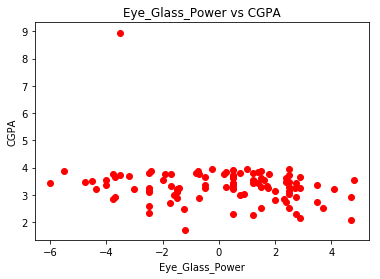

In [49]:
plt.scatter(x3,y, color = 'red') 
plt.title('Eye_Glass_Power vs CGPA')
plt.xlabel('Eye_Glass_Power')
plt.ylabel('CGPA')
plt.show()

In [50]:
def DM1(m1,m2,m3,c,x1,x2,x3,y):
    s=0
    for i in range(len(x1)):
        s+=x1[i]*(y[i]-m1*x1[i]-m2*x2[i]-m3*x3[i]-c)
    return -(2/len(x1))*s

In [51]:
def DM2(m1,m2,m3,c,x1,x2,x3,y):
    s=0
    for i in range(len(x1)):
        s+=x2[i]*(y[i]-m1*x1[i]-m2*x2[i]-m3*x3[i]-c)
    return -(2/len(x1))*s

In [52]:
def DM3(m1,m2,m3,c,x1,x2,x3,y):
    s=0
    for i in range(len(x1)):
        s+=x3[i]*(y[i]-m1*x1[i]-m2*x2[i]-m3*x3[i]-c)
    return -(2/len(x1))*s

In [53]:
def DC(m1,m2,m3,c,x1,x2,x3,y):
    s=0
    for i in range(len(x1)):
        s+=(y[i]-m1*x1[i]-m2*x2[i]-m3*x3[i]-c)
    return -(2/len(x1))*s

In [54]:
def error(m1,m2,m3,c,x1,x2,x3,y):
    s=0
    for i in range(len(x1)):
        y1=m1*x1[i]+m2*x2[i]+m3*x3[i]+c
        s+=(y1-y[i])**2
    return (1/len(x1))*s

In [55]:
def GD(x1,x2,x3,y):
    E=[]
    m1=0
    m2=0
    m3=0
    c=0
    ep=10
    L=0.01
    for i in range(ep):
        er=error(m1,m2,m3,c,x1,x2,x3,y)
        E.append(er)
        dm1=DM1(m1,m2,m3,c,x1,x2,x3,y)
        dm2=DM2(m1,m2,m3,c,x1,x2,x3,y)
        dm3=DM3(m1,m2,m3,c,x1,x2,x3,y)
        dc=DC(m1,m2,m3,c,x1,x2,x3,y)
        m1-=L*dm1
        m2-=L*dm2
        m3-=L*dm3
        c-=L*dc
        #print(m,c)
    return m1,m2,m3,c,E

In [56]:
m1,m2,m3,c,e=GD(x1,x2,x3,y)
print(m1,m2,m3,c)
#print(e)

0.3848455336164432 0.36023243268912036 -0.015108843295042937 0.09010789024334738


In [57]:
PR=[]
for i in range(len(x1)):
    y1=m1*x1[i]+x2[i]*m2+x3[i]*m3+c
    PR.append(y1)
print(PR)

[3.3826310489112905, 3.29106287219913, 3.777725613533558, 3.4714275602397735, 3.6659758653192474, 3.359580619609277, 3.521506218941042, 3.823052143418687, 3.4765974134702113, 3.6320284685854207, 3.4828907285282784, 3.1581030378809225, 3.721662402775124, 3.69904663851258, 3.831655884047425, 3.3911519519350333, 3.238776056474833, 3.1842950419511635, 3.7128060815688326, 3.4868820676470866, 3.076252607211081, 3.069020663490645, 3.2531117685831843, 3.589600608158236, 3.2552881006263017, 2.9208978990136836, 3.750216470081177, 3.8268293542424474, 2.0247472428506565, 3.8721558841275763, 3.7913235724990964, 3.4246201354175363, 3.793429408426578, 2.967820205274047, 3.710918523936772, 3.1914707358553938, 3.188867889142889, 3.01760909604032, 2.1922102248213946, 3.264864418560609, 3.278063157923414, 3.072097267410133, 2.157434399489705, 3.5846186901918924, 3.1219016150232957, 2.7202377926756074, 2.1302136356905454, 3.1754950116799825, 3.7353721540952107, 3.794345341158105, 3.363546826613926, 3.6000

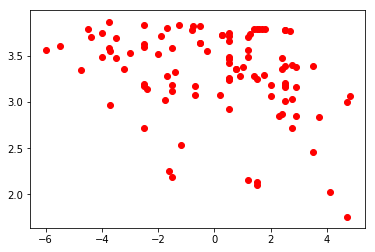

In [58]:
plt.scatter(x3,PR, color = 'red')
plt.show()

In [63]:
t1=eval(input("Enter S.S.C Result :"))
t2=eval(input("Enter H.S.C Result :"))
t3=eval(input("Enter  EGP :"))
p = m1*t1+m2*t2+m3*t3+c
print(p)

Enter S.S.C Result :5
Enter H.S.C Result :5
Enter  EGP :2.2
3.7822582665220708
